In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from dolfin import *
from transient_adv_diff import *

plt.rcParams.update({'font.size': 18})
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
plt.rcParams.update({'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']})

In [2]:
source = Constant(1.0)
left_bc = 0.0
right_bc = 0.0

u1, dof, coord = transient_adv_diff_1d(0.1, 1, 10, source, left_bc, right_bc, dt_num=0.1, steps=12, theta_num=0.5)
u2, dof, coord = transient_adv_diff_1d(0.01, 1, 10, source, left_bc, right_bc, dt_num=0.1, steps=12, theta_num=0.5)

Peclet number =  0.5
Courant number =  1.0
Peclet number =  5.0
Courant number =  1.0


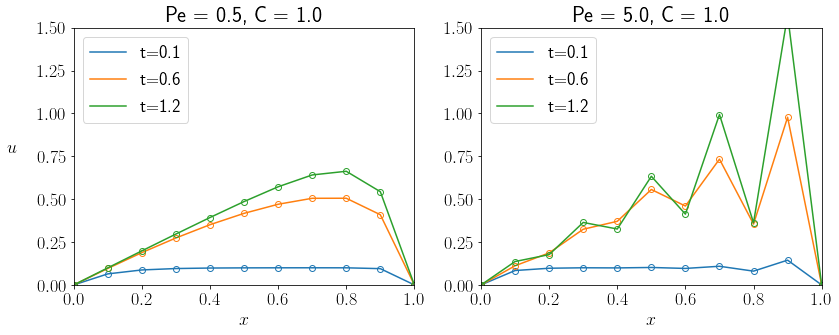

In [3]:
# Fig. 5.5 Model problem using the Crank-Nicolson scheme

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(coord, u1[0].vector()[:], c='C0', label='t=0.1')
ax[0].plot(coord, u1[0].vector()[:], 'o', c='C0', mfc='none')
ax[0].plot(coord, u1[5].vector()[:], c='C1', label='t=0.6')
ax[0].plot(coord, u1[5].vector()[:], 'o', c='C1', mfc='none')
ax[0].plot(coord, u1[11].vector()[:], c='C2', label='t=1.2')
ax[0].plot(coord, u1[11].vector()[:], 'o', c='C2', mfc='none')

ax[1].plot(coord, u2[0].vector()[:], c='C0', label='t=0.1')
ax[1].plot(coord, u2[0].vector()[:], 'o', c='C0', mfc='none')
ax[1].plot(coord, u2[5].vector()[:], c='C1', label='t=0.6')
ax[1].plot(coord, u2[5].vector()[:], 'o', c='C1', mfc='none')
ax[1].plot(coord, u2[11].vector()[:], c='C2', label='t=1.2')
ax[1].plot(coord, u2[11].vector()[:], 'o', c='C2', mfc='none')

ax[0].set_ylim(0,1.5)
ax[0].set_xlim(0,1.0)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$u$', rotation=0, labelpad=25)
ax[0].legend(loc='upper left')
ax[0].set_title('Pe = 0.5, C = 1.0')

ax[1].set_ylim(0,1.5)
ax[1].set_xlim(0,1.0)
ax[1].set_xlabel('$x$')
ax[1].legend(loc='upper left')
ax[1].set_title('Pe = 5.0, C = 1.0')

plt.tight_layout()
plt.show()

In [6]:
source = Constant(1.0)
left_bc = 0.0
right_bc = 0.0
init_cond = Expression('0.0', degree=1)

u1, dof, coord = transient_adv_diff_1d_R22(0.1, 1, 10, source, left_bc, right_bc, init_cond, dt_num=0.3, steps=4, method='Galerkin')
u2, dof, coord = transient_adv_diff_1d_R22(0.01, 1, 10, source, left_bc, right_bc, init_cond, dt_num=0.3, steps=4, method='Galerkin')

Peclet number =  0.5
Courant number =  2.9999999999999996
Peclet number =  5.0
Courant number =  2.9999999999999996


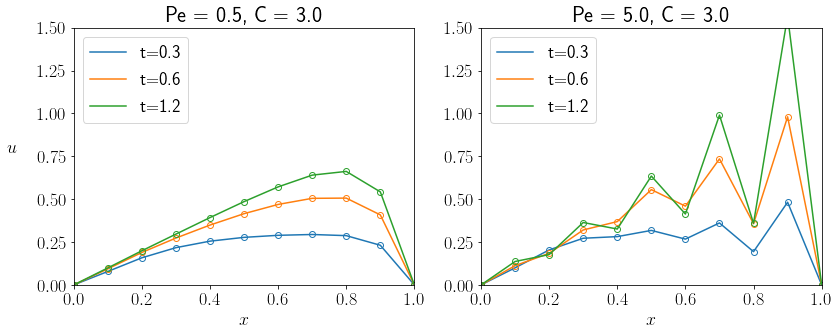

In [7]:
# Fig. 5.8 Model problem using the implicit Pade scheme R22
# Rnn schemes should be combined with Petrov-Galerkin methods (Donea, 2000)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(coord, u1[0].vector()[:], c='C0', label='t=0.3')
ax[0].plot(coord, u1[0].vector()[:], 'o', c='C0', mfc='none')
ax[0].plot(coord, u1[1].vector()[:], c='C1', label='t=0.6')
ax[0].plot(coord, u1[1].vector()[:], 'o', c='C1', mfc='none')
ax[0].plot(coord, u1[3].vector()[:], c='C2', label='t=1.2')
ax[0].plot(coord, u1[3].vector()[:], 'o', c='C2', mfc='none')

ax[1].plot(coord, u2[0].vector()[:], c='C0', label='t=0.3')
ax[1].plot(coord, u2[0].vector()[:], 'o', c='C0', mfc='none')
ax[1].plot(coord, u2[1].vector()[:], c='C1', label='t=0.6')
ax[1].plot(coord, u2[1].vector()[:], 'o', c='C1', mfc='none')
ax[1].plot(coord, u2[3].vector()[:], c='C2', label='t=1.2')
ax[1].plot(coord, u2[3].vector()[:], 'o', c='C2', mfc='none')

ax[0].set_ylim(0,1.5)
ax[0].set_xlim(0,1.0)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$u$', rotation=0, labelpad=25)
ax[0].legend(loc='upper left')
ax[0].set_title('Pe = 0.5, C = 3.0')

ax[1].set_ylim(0,1.5)
ax[1].set_xlim(0,1.0)
ax[1].set_xlabel('$x$')
ax[1].legend(loc='upper left')
ax[1].set_title('Pe = 5.0, C = 3.0')

plt.tight_layout()
plt.show()

In [8]:
source = Constant(1.0)
left_bc = 0.0
right_bc = 0.0
init_cond = Expression('0.0', degree=1)

u1, dof, coord = transient_adv_diff_1d_R11(0.01, 1, 10, source, left_bc, right_bc, init_cond, dt_num=0.1, steps=12, method='SUPG')
u2, dof, coord = transient_adv_diff_1d_R22(0.01, 1, 10, source, left_bc, right_bc, init_cond, dt_num=0.3, steps=4, method='SUPG')
#u2, dof, coord = transient_adv_diff_1d_R11(0.01, 1, 10, source, left_bc, right_bc, dt_num=0.1, steps=12, method='GLS')

Peclet number =  5.0
Courant number =  1.0
Peclet number =  5.0
Courant number =  2.9999999999999996


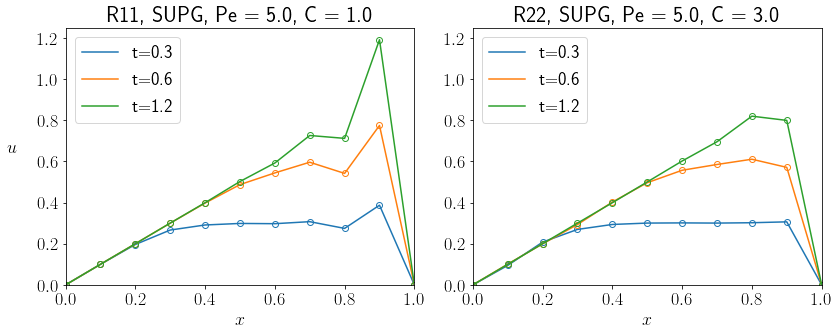

In [9]:
# Fig. 5.14 Model problem (Pe = 5, C = 1) using SUPG and the Crank-Nicolson scheme (left)
# Fig. 5.15 Model problem (Pe = 5, C = 3) using SUPG and the R22 scheme (right)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(coord, u1[2].vector()[:], c='C0', label='t=0.3')
ax[0].plot(coord, u1[2].vector()[:], 'o', c='C0', mfc='none')
ax[0].plot(coord, u1[5].vector()[:], c='C1', label='t=0.6')
ax[0].plot(coord, u1[5].vector()[:], 'o', c='C1', mfc='none')
ax[0].plot(coord, u1[11].vector()[:], c='C2', label='t=1.2')
ax[0].plot(coord, u1[11].vector()[:], 'o', c='C2', mfc='none')

ax[1].plot(coord, u2[0].vector()[:], c='C0', label='t=0.3')
ax[1].plot(coord, u2[0].vector()[:], 'o', c='C0', mfc='none')
ax[1].plot(coord, u2[1].vector()[:], c='C1', label='t=0.6')
ax[1].plot(coord, u2[1].vector()[:], 'o', c='C1', mfc='none')
ax[1].plot(coord, u2[3].vector()[:], c='C2', label='t=1.2')
ax[1].plot(coord, u2[3].vector()[:], 'o', c='C2', mfc='none')

ax[0].set_ylim(0,1.25)
ax[0].set_xlim(0,1.0)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$u$', rotation=0, labelpad=25)
ax[0].legend(loc='upper left')
ax[0].set_title('R11, SUPG, Pe = 5.0, C = 1.0')

ax[1].set_ylim(0,1.25)
ax[1].set_xlim(0,1.0)
ax[1].set_xlabel('$x$')
ax[1].legend(loc='upper left')
ax[1].set_title('R22, SUPG, Pe = 5.0, C = 3.0')

plt.tight_layout()
plt.show()

In [65]:
source = Constant(0.0)
left_bc = 0.0
right_bc = 0.0
init_cond = Expression('5.0/7*exp(- pow((x[0]-2.0/15)*300/7/sqrt(2), 2) )', degree=1)

u1, dof, coord = transient_adv_diff_1d_R11(1.0/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/150, steps=90, method='Galerkin')
u2, dof, coord = transient_adv_diff_1d_R11(0.2/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/150, steps=90, method='Galerkin')
u3, dof, coord = transient_adv_diff_1d_R11(0.01/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/150, steps=90, method='Galerkin')
u4, dof, coord = transient_adv_diff_1d_R11(0.01/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/100, steps=60, method='Galerkin')

Peclet number =  1.0
Courant number =  1.0
Peclet number =  5.0
Courant number =  1.0
Peclet number =  100.0
Courant number =  1.0
Peclet number =  100.0
Courant number =  1.5


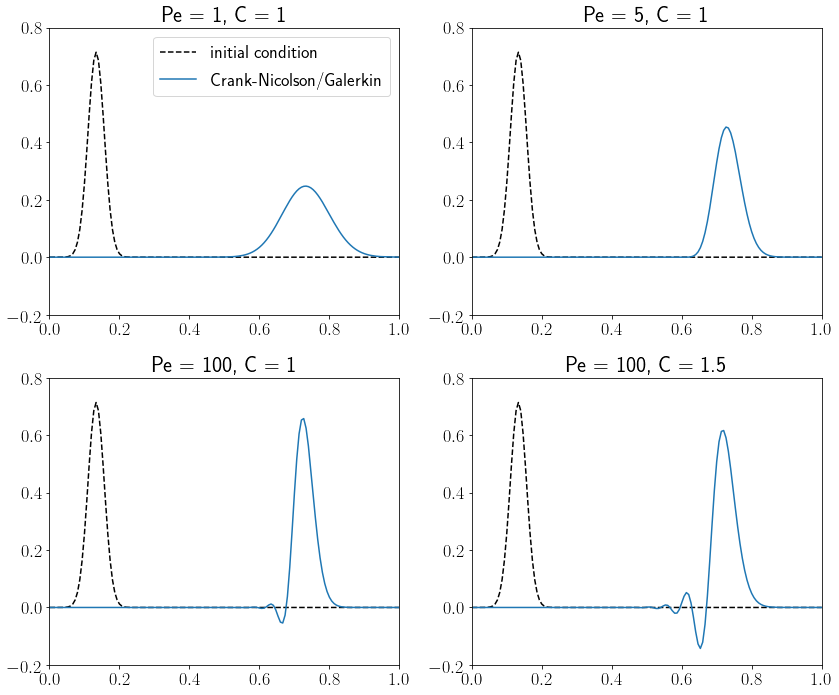

In [67]:
# Fig. 5.16 Gaussian hill using Galerkin and the Crank-Nicolson scheme

x_space = np.linspace(0, 1, 151)
init_u = 5.0/7*np.exp( -((x_space-2.0/15)*300/7/2**0.5)**2 )

fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0,0].plot(x_space, init_u, c='k', ls='--', label='initial condition')
ax[0,0].plot(coord, u1[-1].vector()[:], c='C0', label='Crank-Nicolson/Galerkin')

ax[0,0].set_ylim(-0.2, 0.8)
ax[0,0].set_xlim(0, 1.0)
#ax[0,0].set_ylabel('$u$', rotation=0, labelpad=25)
ax[0,0].legend(loc='upper right')
ax[0,0].set_title('Pe = 1, C = 1')

ax[0,1].plot(x_space, init_u, c='k', ls='--')
ax[0,1].plot(coord, u2[-1].vector()[:], c='C0')

ax[0,1].set_ylim(-0.2, 0.8)
ax[0,1].set_xlim(0, 1.0)
ax[0,1].set_title('Pe = 5, C = 1')

ax[1,0].plot(x_space, init_u, c='k', ls='--')
ax[1,0].plot(coord, u3[-1].vector()[:], c='C0')

ax[1,0].set_ylim(-0.2, 0.8)
ax[1,0].set_xlim(0, 1.0)
ax[1,0].set_title('Pe = 100, C = 1')

ax[1,1].plot(x_space, init_u, c='k', ls='--')
ax[1,1].plot(coord, u4[-1].vector()[:], c='C0')

ax[1,1].set_ylim(-0.2, 0.8)
ax[1,1].set_xlim(0, 1.0)
ax[1,1].set_title('Pe = 100, C = 1.5')

plt.tight_layout()
plt.show()

In [86]:
source = Constant(0.0)
left_bc = 0.0
right_bc = 0.0
init_cond = Expression('5.0/7*exp(- pow((x[0]-2.0/15)*300/7/sqrt(2), 2) )', degree=1)

u1, dof, coord = transient_adv_diff_1d_R22(1.0/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/50, steps=30, method='Galerkin')
u2, dof, coord = transient_adv_diff_1d_R22(0.2/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/50, steps=30, method='Galerkin')
u3, dof, coord = transient_adv_diff_1d_R22(0.01/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=1.0/50, steps=30, method='Galerkin')
u4, dof, coord = transient_adv_diff_1d_R22(0.01/300, 1, 150, source, left_bc, right_bc, init_cond, dt_num=2/75, steps=23, method='Galerkin')

Peclet number =  1.0
Courant number =  3.0
Peclet number =  5.0
Courant number =  3.0
Peclet number =  100.0
Courant number =  3.0
Peclet number =  100.0
Courant number =  4.0


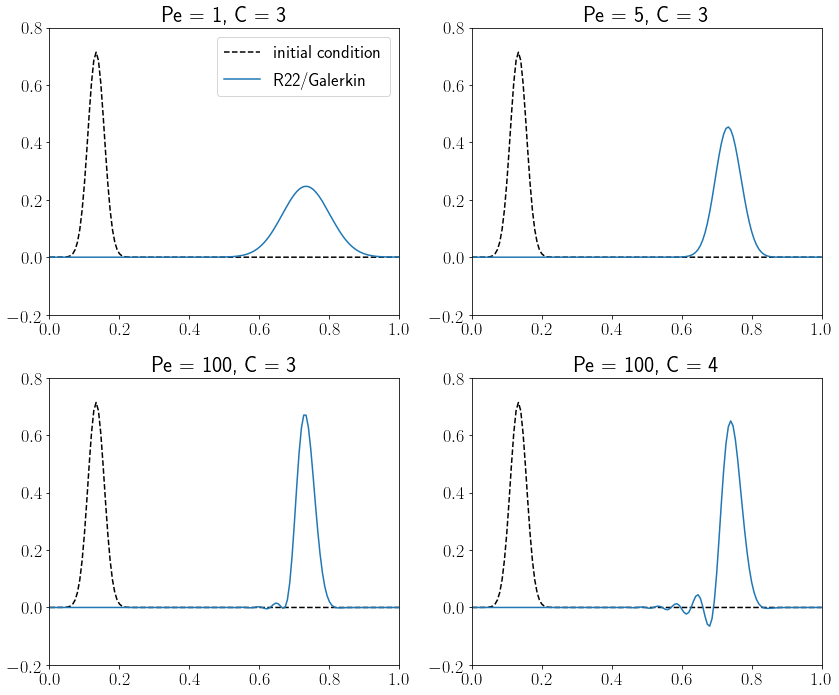

In [88]:
# Fig. 5.17 Gaussian hill using Galerkin and the R22 scheme

x_space = np.linspace(0, 1, 151)
init_u = 5.0/7*np.exp( -((x_space-2.0/15)*300/7/2**0.5)**2 )

fig, ax = plt.subplots(2, 2, figsize=(12,10))
ax[0,0].plot(x_space, init_u, c='k', ls='--', label='initial condition')
ax[0,0].plot(coord, u1[-1].vector()[:], c='C0', label='R22/Galerkin')

ax[0,0].set_ylim(-0.2, 0.8)
ax[0,0].set_xlim(0, 1.0)
#ax[0,0].set_ylabel('$u$', rotation=0, labelpad=25)
ax[0,0].legend(loc='upper right')
ax[0,0].set_title('Pe = 1, C = 3')

ax[0,1].plot(x_space, init_u, c='k', ls='--')
ax[0,1].plot(coord, u2[-1].vector()[:], c='C0')

ax[0,1].set_ylim(-0.2, 0.8)
ax[0,1].set_xlim(0, 1.0)
ax[0,1].set_title('Pe = 5, C = 3')

ax[1,0].plot(x_space, init_u, c='k', ls='--')
ax[1,0].plot(coord, u3[-1].vector()[:], c='C0')

ax[1,0].set_ylim(-0.2, 0.8)
ax[1,0].set_xlim(0, 1.0)
ax[1,0].set_title('Pe = 100, C = 3')

ax[1,1].plot(x_space, init_u, c='k', ls='--')
ax[1,1].plot(coord, u4[-1].vector()[:], c='C0')

ax[1,1].set_ylim(-0.2, 0.8)
ax[1,1].set_xlim(0, 1.0)
ax[1,1].set_title('Pe = 100, C = 4')

plt.tight_layout()
plt.show()